## Ensemble Learning: Bagging & Boosting
How to combine weak learners to build a stronger learner to reduce bias and variance in your ML model

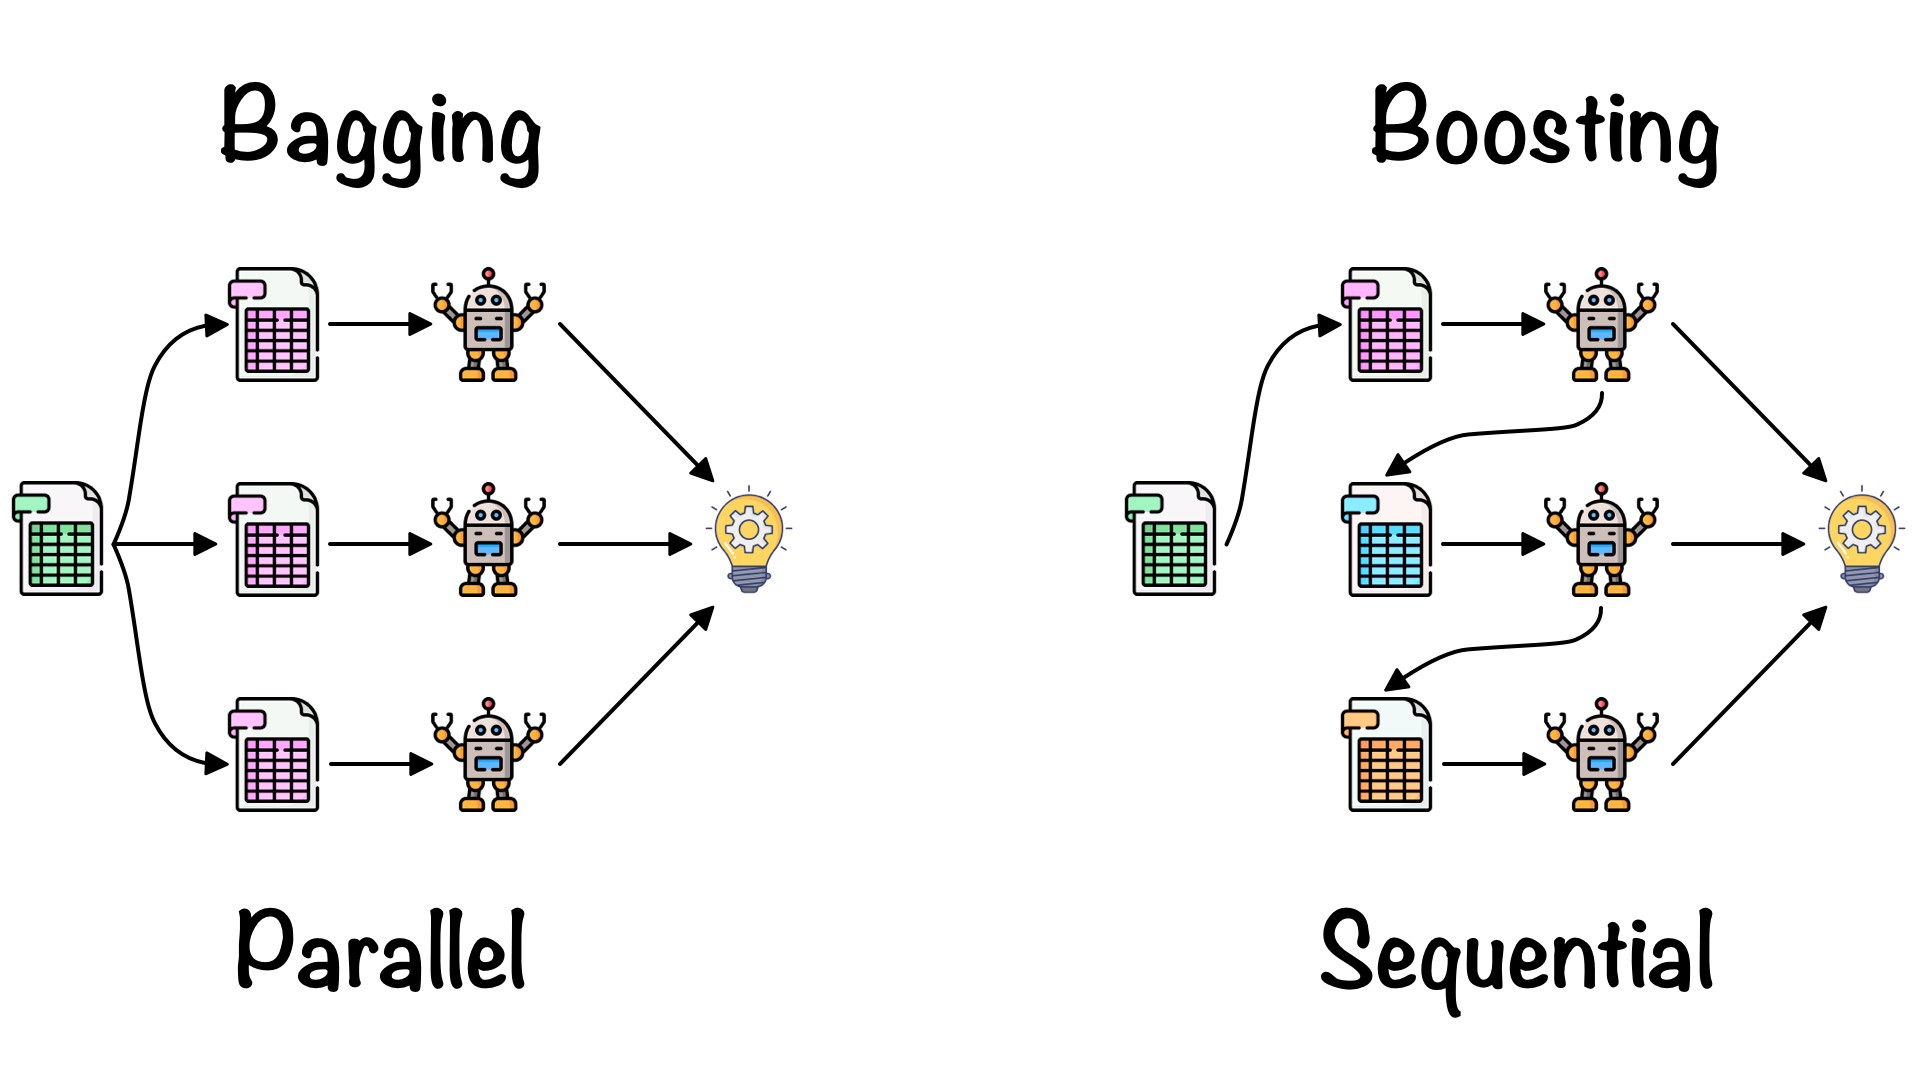

In [2]:
from IPython.display import Image
Image('https://frenzy86.s3.eu-west-2.amazonaws.com/python/bagging1.jpg')

The bias and variance tradeoff is one of the key concerns when working with machine learning algorithms. Fortunately there are some Ensemble Learning based techniques that machine learning practitioners can take advantage of in order to tackle the bias and variance tradeoff, these techniques are bagging and boosting. So, in this blog we are going to explain how bagging and boosting works, what theirs components are and how you can implement them in your ML problem, thus this blog will be divided in the following sections:
* What is Bagging?
* What is Boosting?
* AdaBoost
* Gradient Boosting

## What is Bagging?
Bagging or Bootstrap Aggregation was formally introduced by Leo Breiman in 1996 [3]. Bagging is an Ensemble Learning technique which aims to reduce the error learning through the implementation of a set of homogeneous machine learning algorithms. The key idea of bagging is the use of multiple base learners which are trained separately with a random sample from the training set, which through a voting or averaging approach, produce a more stable and accurate model.

The main two components of bagging technique are: the random sampling with replacement (bootstraping) and the set of homogeneous machine learning algorithms (ensemble learning). The bagging process is quite easy to understand, first it is extracted “n” subsets from the training set, then these subsets are used to train “n” base learners of the same type. For making a prediction, each one of the “n” learners are feed with the test sample, the output of each learner is averaged (in case of regression) or voted (in case of classification). Figure 2 shows an overview of the bagging architecture.

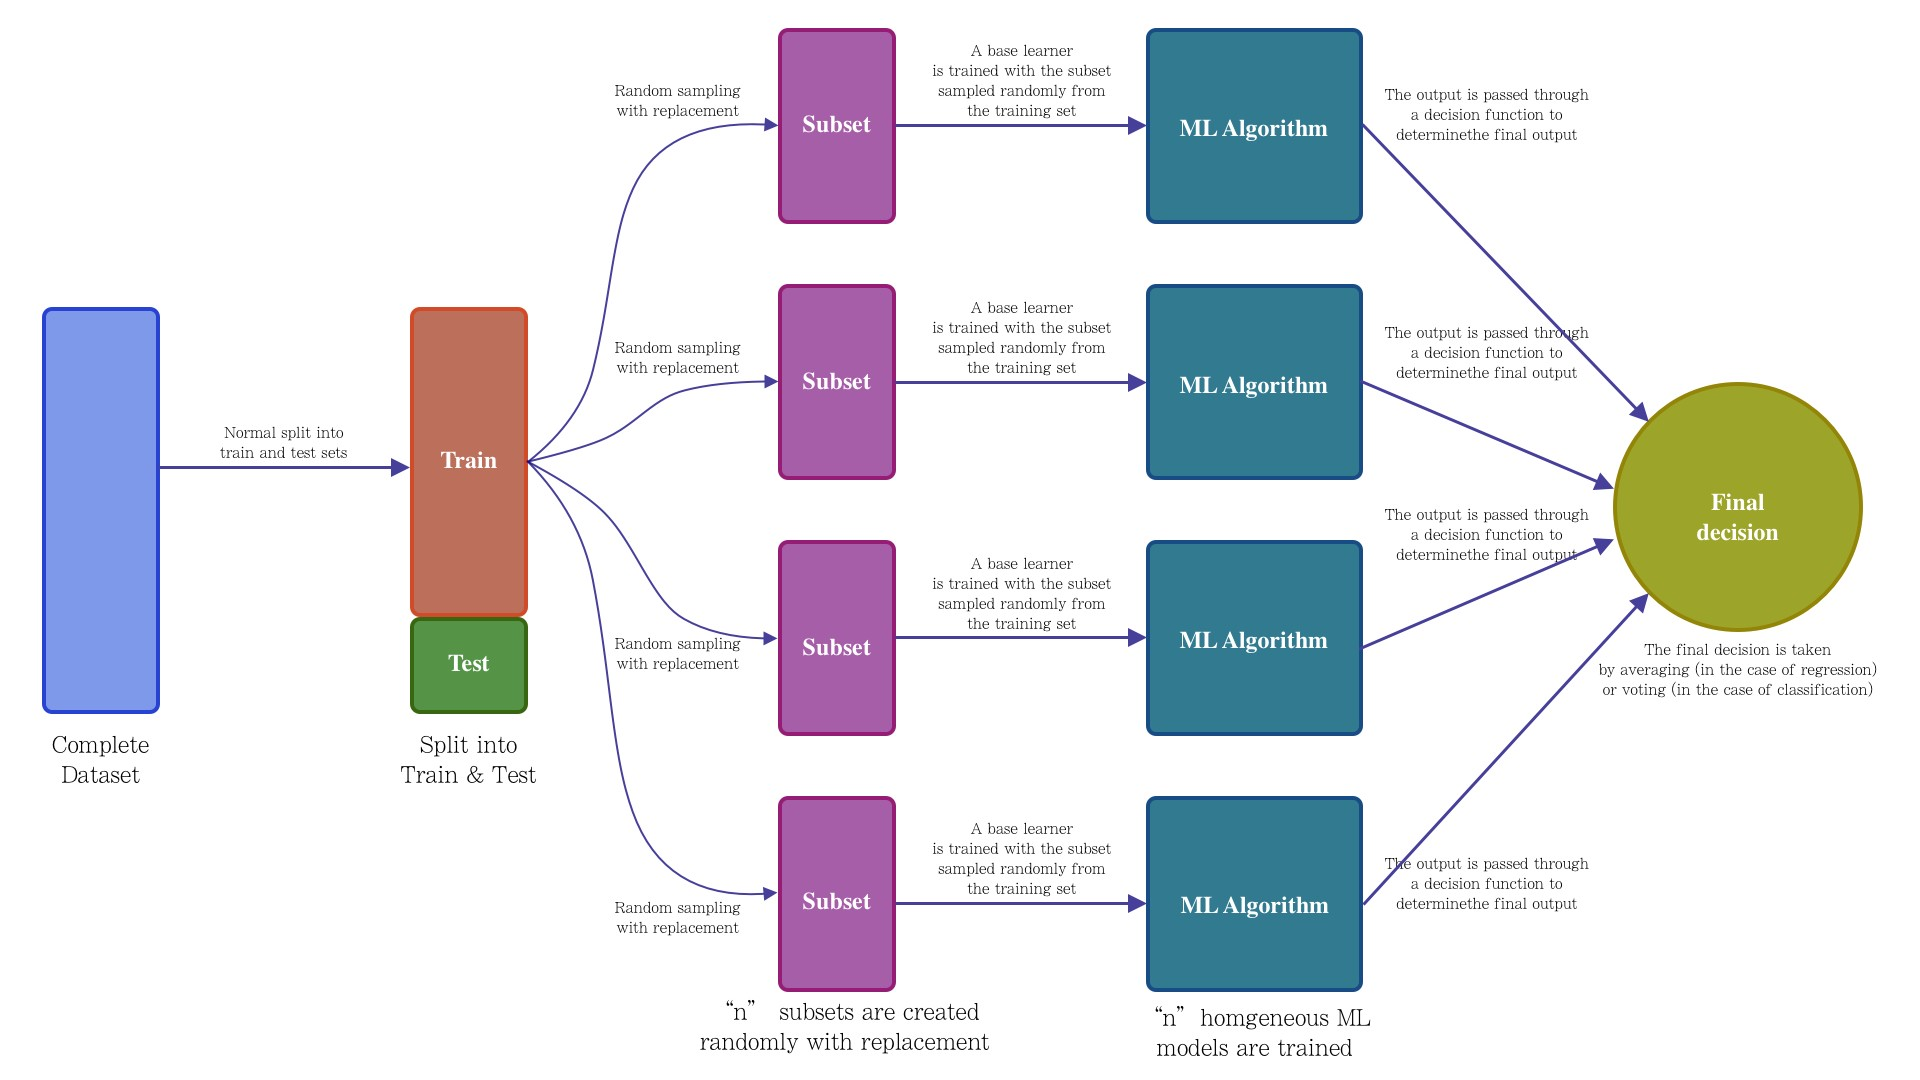

In [5]:
Image('https://frenzy86.s3.eu-west-2.amazonaws.com/python/bagging2.jpg')

It is important to notice that the number of subsets as well as the number of items per subset will be determined by the nature of your ML problem, the same for the type of ML algorithm to be used. In addition, Leo Breiman mention in his paper that he noticed that for classification problems are required more subsets in comparison with regression problems.
For implementing bagging, scikit-learn provides a function to do it easily. For a basic execution we only need to provide some parameters such as the base learner, the number of estimators and the maximum number of samples per subset.

In [4]:
# For this basic implementation, we only need these modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Load the well-known Breast Cancer dataset
# Split into train and test sets
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

# For simplicity, we are going to use as base estimator a Decision Tree with fixed parameters
tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:
# base_estimator = DecisionTree
# n_estimators = 5 : it's gonna be created 5 subsets to train 5 Decision Tree models
# max_samples = 50 : it's gonna be taken randomly 50 items with replacement
# bootstrap = True : means that the sampling is gonna be with replacement
bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(x_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(x_train, y_train)}")
print(f"Test score: {bagging.score(x_test, y_test)}")

Train score: 0.9530516431924883
Test score: 0.965034965034965


In the previous code snippet was created a bagging based model for the well know breast cancer dataset. As base learner was implemented a Decision Tree, 5 subsets were created randomly with replacement from the training set (to train 5 decision tree models). The number of items per subset were 50

One of the key advantages of bagging is that it can be executed in parallel since there is no dependency between estimators. For small datasets, a few estimators will be enough (such as the example above), larger dataset may require more estimators.
Great, so far we’ve already seen what bagging is and how it works. Let’s see what boosting is, its components and why it is related to bagging, let’s go for it!

## What is Boosting?
Boosting is an Ensemble Learning technique that, like bagging, makes use of a set of base learners to improve the stability and effectiveness of a ML model. The idea behind a boosting architecture is the generation of sequential hypotheses, where each hypothesis tries to improve or correct the mistakes made in the previous one [4]. The central idea of boosting is the implementation of homogeneous ML algorithms in a sequential way, where each of these ML algorithms tries to improve the stability of the model by focusing on the errors made by the previous ML algorithm. The way in which the errors of each base learner is considered to be improved with the next base learner in the sequence, is the key differentiator between all variations of the boosting technique.

The boosting technique has been studied and improved over the years, several variations have been added to the core idea of boosting, some of the most popular are: AdaBoost (Adaptive Boosting), Gradient Boosting and XGBoost (Extreme Gradient Boosting). As mentioned above, the key differentiator between boosting-based techniques is the way in which errors are penalized (by modifying weights or minimizing a loss function) as well as how the data is sampled.
For a better understanding of the differences between some of the boosting techniques, let’s see in a general way how AdaBoost and Gradient Boosting work, two of the most common variations of the boosting technique, let’s go for it!

## AdaBoost
AdaBoost is an algorithm based on the boosting technique, it was introduced in 1995 by Freund and Schapire [5]. AdaBoost implements a vector of weights to penalize those samples that were incorrectly inferred (by increasing the weight) and reward those that were correctly inferred (by decreasing the weight). Updating this weight vector will generate a distribution where it will be more likely to extract those samples with higher weight (that is, those that were incorrectly inferred), this sample will be introduced to the next base learner in the sequence. This will be repeated until a stop criterion is met. Likewise, each base learner in the sequence will have assigned a weight, the higher the performance, the higher the weight and the greater the impact of this base learner for the final decision. Finally, to make a prediction, each base learner in the sequence will be fed with the test data, each of the predictions of each model will be voted (for the classification case) or averaged (for the regression case). In Figure 3 we observe the descriptive architecture of the AdaBoost operation.

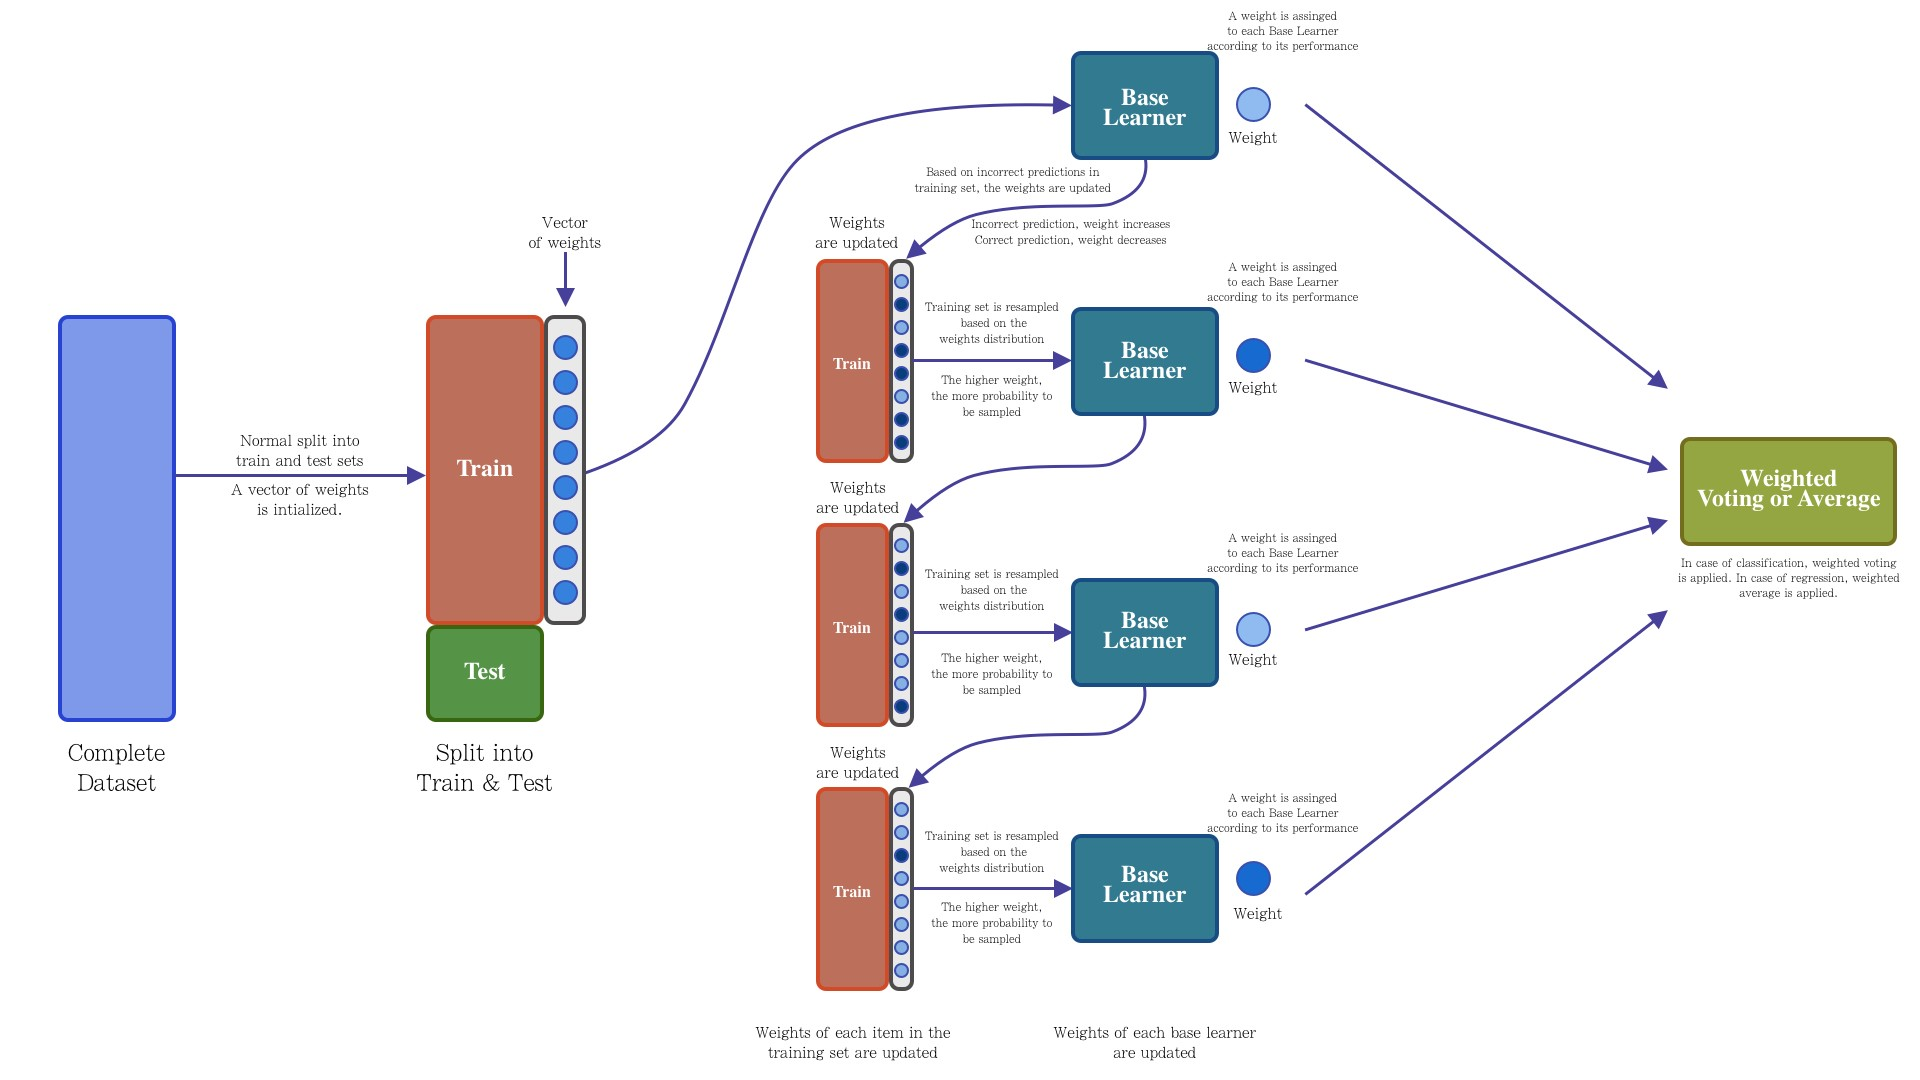

In [6]:
Image('https://frenzy86.s3.eu-west-2.amazonaws.com/python/bagging3.jpg')

In [7]:
# For this basic implementation, we only need these modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Load the well-known Breast Cancer dataset
# Split into train and test sets
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

# The base learner will be a decision tree with depth = 2
tree = DecisionTreeClassifier(max_depth=2, random_state=23)

# AdaBoost initialization
# It's defined the decision tree as the base learner
# The number of estimators will be 5
# The penalizer for the weights of each estimator is 0.1
adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=5, learning_rate=0.1, random_state=23)

# Train!
adaboost.fit(x_train, y_train)

# Evaluation
print(f"Train score: {adaboost.score(x_train, y_train)}")
print(f"Test score: {adaboost.score(x_test, y_test)}")

Train score: 0.9694835680751174
Test score: 0.958041958041958


As we can see, the base learner that we are using is a decision tree (it is suggested that it be a decision tree, however, you can try some other ML algorithm), we are also defining only 5 estimators for the base learner sequence (this is enough for the toy dataset that we are trying to predict)

## Gradient Boosting
The Gradient Boosting method does not implement a vector of weights like AdaBoost does. As its name implies, it implements the calculation of the gradient for the optimization of a given loss function. The core idea of Gradient Boosting is based on minimizing the residuals of each learner base in a sequential way, this minimization is carried out through the calculation of the gradient applied to a specific loss function (either for classification or regression). Then each base learner added to the sequence will minimize the residuals determined by the previous base learner. This will be repeated until the error function is as close to zero or until a specified number of base learners is completed. Finally, to make a prediction, each of the base learners are fed with the test data whose outputs are parameterized and subsequently added to generate the final prediction.


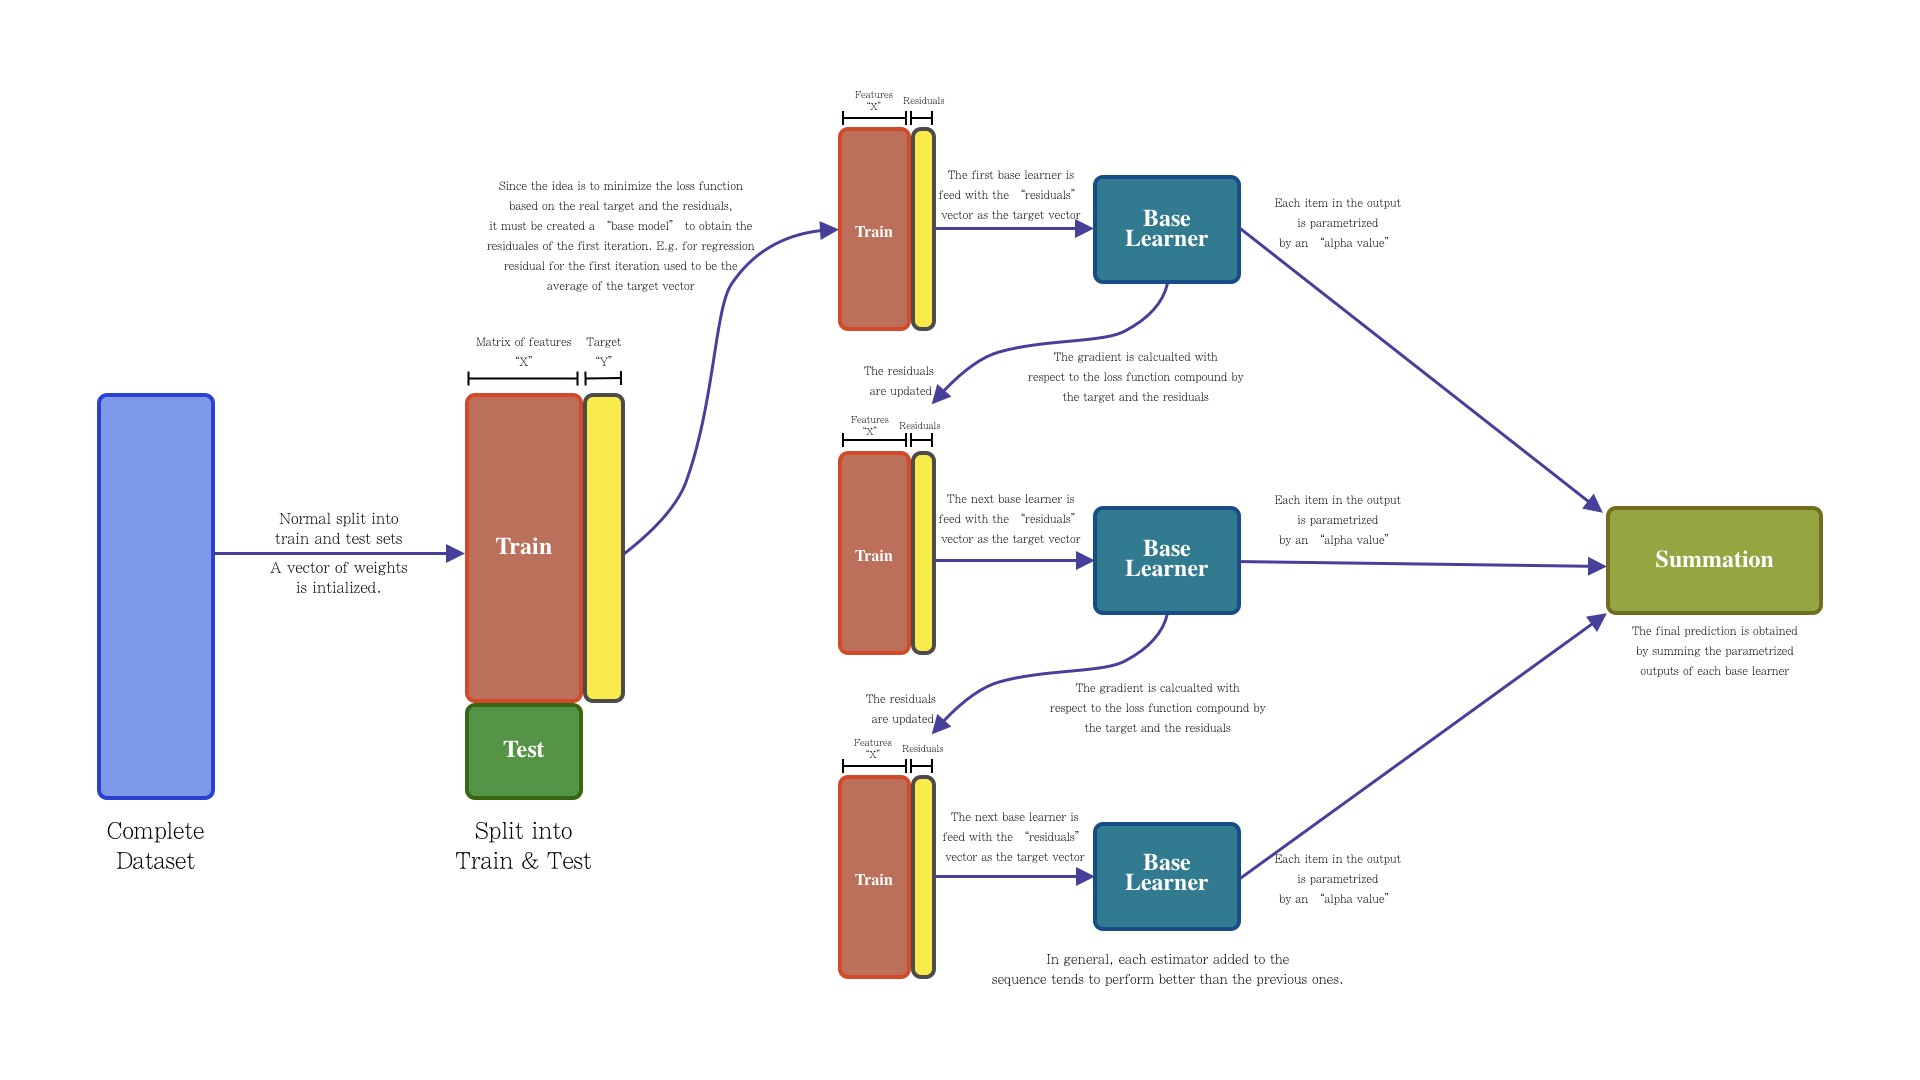

In [8]:
Image('https://frenzy86.s3.eu-west-2.amazonaws.com/python/bagging4.jpg')

In [9]:
# For this basic implementation, we only need these modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Load the well-known Breast Cancer dataset
# Split into train and test sets
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

# Gradient Boosting initialization
# The base learner is a decision tree as default
# The number of estimators is 5
# The depth for each deciion tree is 2
# The learning rate for each estimator in the sequence is 1
gradientBoosting = GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_depth=2, random_state=23)

# Train!
gradientBoosting.fit(x_train, y_train)

# Evaluation
print(f"Train score: {gradientBoosting.score(x_train, y_train)}")
print(f"Test score: {gradientBoosting.score(x_test, y_test)}")

Train score: 0.9906103286384976
Test score: 0.965034965034965


Gradient Boosting works with decision trees by default, that is why in the implementation we do not define a specific base learner. We are defining that each tree in the sequence will have a maximum depth of 2, the number of trees will be 5 and the learning rate for each tree will be 0.1, running this we obtain:

## Conclusion
In this blog we have seen two of the most widely implemented Ensemble Learning techniques.
As we have seen, bagging is a technique that performs random samples without replacement to train “n” base learners, this allows the model to be processed in parallel. It is because of this random sampling that bagging is a technique that mostly allows to reduce the variance. On the other hand, boosting is a sequentially constructed technique where each model in the sequence tries to focus on the error of the previous base learner. Although boosting is a technique that mainly allows to reduce the variance, it is highly prone to over-fitting the model.